# Flood Prediction Machine Learning Model 

In [1]:
# This Machine Learning Model uses 5 Machine Learning Algorithms namely KNN Classification, Logistic Regression[LR], Support 
# Vector[SVM], Decision Tree[DT] and Random Forest[RF] to get the best possible model to predict the floods using Kerela Rainfall Data.

## Data Insights

#### Importing Required Libraries.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
data = pd.read_csv('kerala.csv')
print(data)

    SUBDIVISION  YEAR   JAN   FEB   MAR    APR    MAY     JUN     JUL     AUG  \
0        KERALA  1901  28.7  44.7  51.6  160.0  174.7   824.6   743.0   357.5   
1        KERALA  1902   6.7   2.6  57.3   83.9  134.5   390.9  1205.0   315.8   
2        KERALA  1903   3.2  18.6   3.1   83.6  249.7   558.6  1022.5   420.2   
3        KERALA  1904  23.7   3.0  32.2   71.5  235.7  1098.2   725.5   351.8   
4        KERALA  1905   1.2  22.3   9.4  105.9  263.3   850.2   520.5   293.6   
..          ...   ...   ...   ...   ...    ...    ...     ...     ...     ...   
113      KERALA  2014   4.6  10.3  17.9   95.7  251.0   454.4   677.8   733.9   
114      KERALA  2015   3.1   5.8  50.1  214.1  201.8   563.6   406.0   252.2   
115      KERALA  2016   2.4   3.8  35.9  143.0  186.4   522.2   412.3   325.5   
116     KERALA   2017   1.9   6.8   8.9   43.6  173.5   498.5   319.6   531.8   
117      KERALA  2018  29.1  52.1  48.6  116.4  183.8   625.4  1048.5  1398.9   

       SEP    OCT    NOV   

In [3]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [4]:
data.tail()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO
117,KERALA,2018,29.1,52.1,48.6,116.4,183.8,625.4,1048.5,1398.9,423.6,356.1,125.4,65.1,4473.0,YES


# Finding number of missing values

In [5]:
data.isnull().sum()  # cheaking if any colomns is left empty or not.

SUBDIVISION         0
YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64

# Analyzing the Dataset

In [6]:
print(data.shape)

(118, 16)


In [7]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,1959.500000,12.218644,15.633898,36.670339,110.330508,228.644915,651.617797,698.220339,430.369492,246.207627,293.207627,162.311017,40.009322,2925.405085
std,34.207699,15.473766,16.406290,30.063862,44.633452,147.548778,186.181363,228.988966,181.980463,121.901131,93.705253,83.200485,36.676330,452.169407
min,1901.000000,0.000000,0.000000,0.100000,13.100000,53.400000,196.800000,167.500000,178.600000,41.300000,68.500000,31.500000,0.100000,2068.800000
25%,1930.250000,2.175000,4.700000,18.100000,74.350000,125.050000,535.550000,533.200000,316.725000,155.425000,222.125000,93.025000,10.350000,2613.525000
50%,1959.500000,5.800000,8.350000,28.400000,110.400000,184.600000,625.600000,691.650000,386.250000,223.550000,284.300000,152.450000,31.100000,2934.300000
75%,1988.750000,18.175000,21.400000,49.825000,136.450000,264.875000,786.975000,832.425000,500.100000,334.500000,355.150000,218.325000,54.025000,3170.400000
max,2018.000000,83.500000,79.000000,217.200000,238.000000,738.800000,1098.200000,1526.500000,1398.900000,526.700000,567.900000,365.600000,202.300000,4473.000000


In [8]:
data.info

<bound method DataFrame.info of     SUBDIVISION  YEAR   JAN   FEB   MAR    APR    MAY     JUN     JUL     AUG  \
0        KERALA  1901  28.7  44.7  51.6  160.0  174.7   824.6   743.0   357.5   
1        KERALA  1902   6.7   2.6  57.3   83.9  134.5   390.9  1205.0   315.8   
2        KERALA  1903   3.2  18.6   3.1   83.6  249.7   558.6  1022.5   420.2   
3        KERALA  1904  23.7   3.0  32.2   71.5  235.7  1098.2   725.5   351.8   
4        KERALA  1905   1.2  22.3   9.4  105.9  263.3   850.2   520.5   293.6   
..          ...   ...   ...   ...   ...    ...    ...     ...     ...     ...   
113      KERALA  2014   4.6  10.3  17.9   95.7  251.0   454.4   677.8   733.9   
114      KERALA  2015   3.1   5.8  50.1  214.1  201.8   563.6   406.0   252.2   
115      KERALA  2016   2.4   3.8  35.9  143.0  186.4   522.2   412.3   325.5   
116     KERALA   2017   1.9   6.8   8.9   43.6  173.5   498.5   319.6   531.8   
117      KERALA  2018  29.1  52.1  48.6  116.4  183.8   625.4  1048.5  1398.9

In [9]:
if 'FLOODS' in data.columns:
    print("\nEncoding the 'FLOODS' feature (Label Encoding: 'YES' -> 1, 'NO' -> 0)...")
    data['FLOODS'] = data['FLOODS'].str.strip()  # Remove any leading/trailing spaces
    data['FLOODS'] = data['FLOODS'].replace({'YES': 1, 'NO': 0})  # Replace and reassign
    print("Encoding complete! Here's a preview of the encoded 'FLOODS' feature:")
    print(data['FLOODS'].head())
else:
    print("\nError: The target column 'FLOODS' is missing from the dataset.")


Encoding the 'FLOODS' feature (Label Encoding: 'YES' -> 1, 'NO' -> 0)...
Encoding complete! Here's a preview of the encoded 'FLOODS' feature:
0    1
1    1
2    1
3    1
4    0
Name: FLOODS, dtype: int64


C:\Users\Niraj\AppData\Local\Temp\ipykernel_11012\2055006258.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['FLOODS'] = data['FLOODS'].replace({'YES': 1, 'NO': 0})  # Replace and reassign


In [10]:
#Printing the clean data
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0


In [11]:
# Seperating the data which we are gonna use for prediction.
x=data.iloc[:,1:14]
x.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2


In [12]:
# Now seperate the flood label from the dataset.
y=data.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      0
      ..
113    1
114    0
115    0
116    0
117    1
Name: FLOODS, Length: 118, dtype: int64

# Plotting the Data


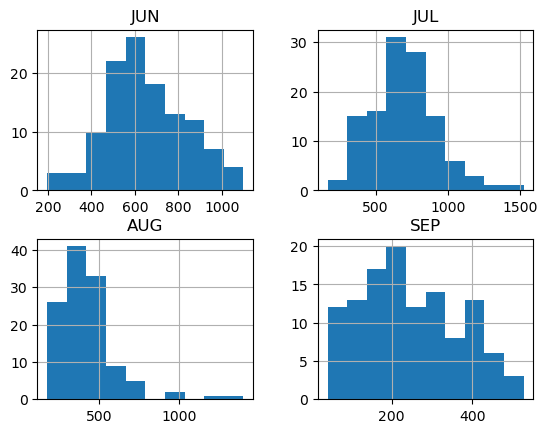

In [13]:
import matplotlib.pyplot as plt   
# sets the backend of matplotlib to the 'inline' backend. 
%matplotlib inline                   
c = data[['JUN','JUL','AUG','SEP']]
c.hist()
plt.show()
# How the rainfall index vary during rainy season

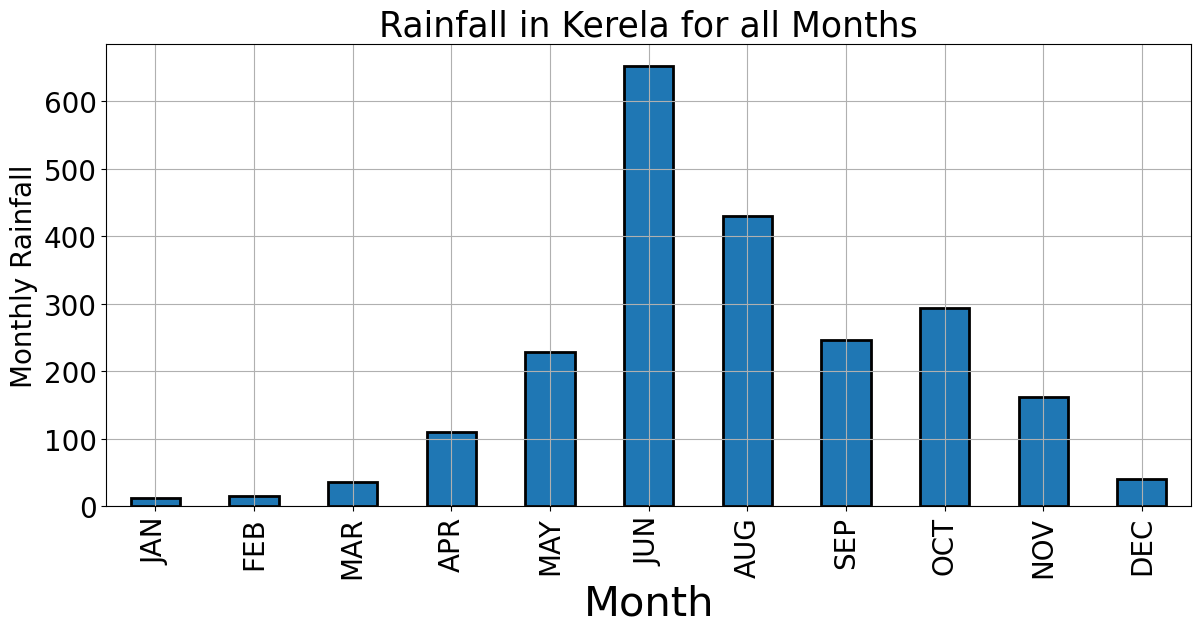

In [14]:
ax = data[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN', 'AUG', 'SEP', 'OCT','NOV','DEC']].mean().plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2,figsize=(14,6))
plt.xlabel('Month',fontsize=30)
plt.ylabel('Monthly Rainfall',fontsize=20)
plt.title('Rainfall in Kerela for all Months',fontsize=25)
ax.tick_params(labelsize=20)
plt.grid()
plt.ioff()

# Using sklearn to develop the ML Model

In [15]:
# Scaling the data between 0 and 1.
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.        , 0.34371257, 0.56582278, ..., 0.39727673, 0.95570189,
        0.2388724 ],
       [0.00854701, 0.08023952, 0.03291139, ..., 0.5804966 , 0.37952709,
        0.60039565],
       [0.01709402, 0.03832335, 0.23544304, ..., 0.57188626, 0.37563604,
        0.29129575],
       ...,
       [0.98290598, 0.02874251, 0.04810127, ..., 0.31517821, 0.28105358,
        0.11622156],
       [0.99145299, 0.02275449, 0.08607595, ..., 0.24809772, 0.18258007,
        0.18793274],
       [1.        , 0.34850299, 0.65949367, ..., 0.57589107, 0.28105358,
        0.3214639 ]])

In [16]:
#dividing the dataset into training dataset and test dataset. 
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
33,1934,74.5,1.7,47.7,92.4,106.7,852.9,415.0,337.2,48.4,335.9,93.4,4.9
28,1929,12.8,29.8,58.9,210.7,148.0,946.6,844.0,293.9,268.9,350.4,158.2,39.4
32,1933,1.0,9.3,36.9,139.5,738.8,859.3,773.4,479.5,469.7,397.0,126.1,42.3
99,2000,11.7,57.8,21.5,96.3,124.5,633.8,343.2,566.5,195.8,214.2,78.1,69.1
42,1943,83.5,14.6,38.4,107.5,478.4,794.5,831.6,183.3,257.6,427.2,223.4,24.3


In [17]:
x_train.dtypes

YEAR      int64
JAN     float64
FEB     float64
MAR     float64
APR     float64
MAY     float64
JUN     float64
JUL     float64
AUG     float64
SEP     float64
OCT     float64
NOV     float64
DEC     float64
dtype: object

In [18]:
x_test.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
116,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1
45,1946,1.8,5.4,108.4,139.8,83.0,919.0,671.7,695.6,199.4,266.1,273.0,202.3
50,1951,6.6,6.5,41.6,175.9,148.5,774.1,544.6,190.6,313.8,250.6,229.6,23.2
48,1949,0.6,1.8,4.5,98.1,440.0,536.3,758.7,445.2,354.5,229.1,71.9,1.8
110,2011,20.5,45.7,24.1,165.2,124.2,788.5,536.8,492.7,391.2,227.2,169.7,49.5


In [19]:
# type casting.
y_train=y_train.astype('int')
y_train

33    0
28    1
32    1
99    0
42    1
     ..
54    1
87    0
95    0
86    0
40    1
Name: FLOODS, Length: 94, dtype: int32

In [20]:
y_test=y_test.astype('int')
y_test

116    0
45     1
50     0
48     1
110    1
79     0
10     0
62     0
56     1
41     1
21     1
73     0
52     0
20     0
37     0
7      0
66     0
112    1
55     0
13     0
14     1
61     1
78     0
29     1
Name: FLOODS, dtype: int32

# Using Prediction Algorithms:

## KNN classifier to predict

In [21]:
clf=neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier()

In [22]:
# Predicted chance of Flood.
print("Predicted Values for the Floods:")
y_predict=clf.predict(x_test)
y_predict

Predicted Values for the Floods:


array([0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0])

In [23]:
print("Actual Values for the Floods:")
print(y_test)

Actual Values for the Floods:
116    0
45     1
50     0
48     1
110    1
79     0
10     0
62     0
56     1
41     1
21     1
73     0
52     0
20     0
37     0
7      0
66     0
112    1
55     0
13     0
14     1
61     1
78     0
29     1
Name: FLOODS, dtype: int32


In [24]:
print("List of the Predicted Values:")
print(y_predict)

List of the Predicted Values:
[0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0]


In [25]:
# Scaling the dataset.
from sklearn.model_selection import cross_val_score,cross_val_predict
x_train_std= minmax.fit_transform(x_train)
x_test_std= minmax.fit_transform(x_test)
knn_acc=cross_val_score(clf,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=-1)
knn_proba=cross_val_predict(clf,x_train_std,y_train,cv=3,method='predict_proba')

In [26]:
knn_acc

array([0.78125   , 0.80645161, 0.74193548])

In [27]:
knn_proba

array([[0.6, 0.4],
       [0.2, 0.8],
       [0. , 1. ],
       [1. , 0. ],
       [0.2, 0.8],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.8, 0.2],
       [1. , 0. ],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.2, 0.8],
       [1. , 0. ],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.6, 0.4],
       [1. , 0. ],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.4, 0.6],
       [0. , 1. ],
       [0. , 1. ],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.4, 0.6],
       [1. ,

### How accurate is our model?

In [28]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\nAccuracy Score:%f"%(accuracy_score(y_test,y_predict)*100))
print("Recall Score:%f"%(recall_score(y_test,y_predict)*100))
print("ROC score:%f"%(roc_auc_score(y_test,y_predict)*100))
print(confusion_matrix(y_test,y_predict))
x_train_std=minmax.fit_transform(x_train)         # fit the values in between 0 and 1.
y_train_std=minmax.transform(x_test)


Accuracy Score:91.666667
Recall Score:90.000000
ROC score:91.428571
[[13  1]
 [ 1  9]]


## Logistic Regression to predict

In [29]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=500)  # Increase max_iter to allow convergence
lr.fit(x_train, y_train)

lr_acc = cross_val_score(lr, x_train_std, y_train, cv=3, scoring='accuracy', n_jobs=-1)
lr_proba = cross_val_predict(lr, x_train_std, y_train, cv=3, method='predict_proba')

print("Logistic Regression Accuracy from Cross-Validation:", lr_acc)
print("Predicted Probabilities (Cross-Validation):", lr_proba)

Logistic Regression Accuracy from Cross-Validation: [0.84375    0.87096774 1.        ]
Predicted Probabilities (Cross-Validation): [[0.63762162 0.36237838]
 [0.29269747 0.70730253]
 [0.09261421 0.90738579]
 [0.78284882 0.21715118]
 [0.23979603 0.76020397]
 [0.46670754 0.53329246]
 [0.50533479 0.49466521]
 [0.59061889 0.40938111]
 [0.57004198 0.42995802]
 [0.52743329 0.47256671]
 [0.50784624 0.49215376]
 [0.71600733 0.28399267]
 [0.46701488 0.53298512]
 [0.31874634 0.68125366]
 [0.63930103 0.36069897]
 [0.36030801 0.63969199]
 [0.7178873  0.2821127 ]
 [0.55661878 0.44338122]
 [0.57535454 0.42464546]
 [0.79092497 0.20907503]
 [0.61182485 0.38817515]
 [0.69997341 0.30002659]
 [0.49185961 0.50814039]
 [0.404282   0.595718  ]
 [0.39938424 0.60061576]
 [0.78682914 0.21317086]
 [0.27453146 0.72546854]
 [0.23361255 0.76638745]
 [0.75183201 0.24816799]
 [0.40247787 0.59752213]
 [0.64926001 0.35073999]
 [0.35336685 0.64663315]
 [0.44875924 0.55124076]
 [0.62595069 0.37404931]
 [0.35096031 0.6490

In [30]:

# from sklearn.model_selection import cross_val_score,cross_val_predict
# from sklearn.linear_model import LogisticRegression
# lr=LogisticRegression()
# lr.fit(x_train,y_train)
# lr_acc=cross_val_score(lr,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=-1)
# lr_proba=cross_val_predict(lr,x_train_std,y_train,cv=3,method='predict_proba')

In [31]:
lr_acc

array([0.84375   , 0.87096774, 1.        ])

In [32]:
lr_proba

array([[0.63762162, 0.36237838],
       [0.29269747, 0.70730253],
       [0.09261421, 0.90738579],
       [0.78284882, 0.21715118],
       [0.23979603, 0.76020397],
       [0.46670754, 0.53329246],
       [0.50533479, 0.49466521],
       [0.59061889, 0.40938111],
       [0.57004198, 0.42995802],
       [0.52743329, 0.47256671],
       [0.50784624, 0.49215376],
       [0.71600733, 0.28399267],
       [0.46701488, 0.53298512],
       [0.31874634, 0.68125366],
       [0.63930103, 0.36069897],
       [0.36030801, 0.63969199],
       [0.7178873 , 0.2821127 ],
       [0.55661878, 0.44338122],
       [0.57535454, 0.42464546],
       [0.79092497, 0.20907503],
       [0.61182485, 0.38817515],
       [0.69997341, 0.30002659],
       [0.49185961, 0.50814039],
       [0.404282  , 0.595718  ],
       [0.39938424, 0.60061576],
       [0.78682914, 0.21317086],
       [0.27453146, 0.72546854],
       [0.23361255, 0.76638745],
       [0.75183201, 0.24816799],
       [0.40247787, 0.59752213],
       [0.

In [33]:
y_pred=lr.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1])

In [34]:
print(y_test.values)

[0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1]


In [35]:
print("List of the Predicted Values:")
print(y_pred)

List of the Predicted Values:
[0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1]


### Accuracy and Efficiency of our Model 

In [36]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:91.666667
recall score:90.000000
roc score:91.428571
[[13  1]
 [ 1  9]]


## Support Vector Classification to predict

In [37]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf',probability=True)
svc_classifier=svc.fit(x_train,y_train)
svc_acc=cross_val_score(svc_classifier,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
svc_proba=cross_val_predict(svc_classifier,x_train_std,y_train,cv=3,method='predict_proba')

In [38]:
svc_acc

array([0.9375    , 0.83870968, 1.        ])

In [39]:
svc_proba

array([[8.49927035e-01, 1.50072965e-01],
       [6.43438674e-02, 9.35656133e-01],
       [5.82024045e-03, 9.94179760e-01],
       [9.57861003e-01, 4.21389971e-02],
       [1.19401413e-01, 8.80598587e-01],
       [6.84504490e-01, 3.15495510e-01],
       [7.69978284e-01, 2.30021716e-01],
       [9.53441789e-01, 4.65582108e-02],
       [7.49821075e-01, 2.50178925e-01],
       [3.71600983e-01, 6.28399017e-01],
       [5.46533376e-01, 4.53466624e-01],
       [9.81347827e-01, 1.86521734e-02],
       [2.80453552e-01, 7.19546448e-01],
       [1.02231624e-01, 8.97768376e-01],
       [9.28259029e-01, 7.17409709e-02],
       [5.90632882e-02, 9.40936712e-01],
       [9.03835020e-01, 9.61649797e-02],
       [7.53668617e-01, 2.46331383e-01],
       [7.98818292e-01, 2.01181708e-01],
       [9.97728062e-01, 2.27193847e-03],
       [8.07274055e-01, 1.92725945e-01],
       [9.23946427e-01, 7.60535728e-02],
       [3.17119753e-01, 6.82880247e-01],
       [2.24532997e-01, 7.75467003e-01],
       [1.884755

In [40]:
svc_scores=svc_proba[:,1]
svc_scores

array([0.15007297, 0.93565613, 0.99417976, 0.042139  , 0.88059859,
       0.31549551, 0.23002172, 0.04655821, 0.25017893, 0.62839902,
       0.45346662, 0.01865217, 0.71954645, 0.89776838, 0.07174097,
       0.94093671, 0.09616498, 0.24633138, 0.20118171, 0.00227194,
       0.19272595, 0.07605357, 0.68288025, 0.775467  , 0.81152447,
       0.01634315, 0.91220431, 0.92858192, 0.05126688, 0.52824563,
       0.17745058, 0.86270476, 0.56621898, 0.0742271 , 0.82756834,
       0.50918222, 0.80516831, 0.91172029, 0.95266941, 0.99999235,
       0.31875861, 0.98758488, 0.31121201, 0.03650108, 0.00802619,
       0.63147127, 0.80656171, 0.99033452, 0.44068136, 0.51530662,
       0.873858  , 0.96206373, 0.00442245, 0.97128489, 0.88107765,
       0.2242907 , 0.88905175, 0.8376576 , 0.7779134 , 0.93938504,
       0.02540401, 0.20818897, 0.06803141, 0.11248266, 0.79575364,
       0.36841095, 0.36328015, 0.05280992, 0.98449231, 0.09701914,
       0.79330673, 0.98877825, 0.87863834, 0.26932811, 0.91548

In [41]:
y_pred=svc_classifier.predict(x_test)
print("Actual Flood Values:")
print(y_test.values)

Actual Flood Values:
[0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1]


In [42]:
print("Predicted Flood Values:")
print(y_pred)

Predicted Flood Values:
[0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0]


### Accuracy of our model

In [43]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:75.000000
recall score:90.000000
roc score:77.142857
[[9 5]
 [1 9]]


# Decision Tree Classification to Predict

In [44]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf=DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)
dtc_clf_acc=cross_val_score(dtc_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
dtc_clf_acc

array([0.78125   , 0.58064516, 0.61290323])

In [45]:
print("Predicted Values:")
y_pred=dtc_clf.predict(x_test)
y_pred

Predicted Values:


array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1])

In [46]:
print("Actual Values:")
print(y_test.values)

Actual Values:
[0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1]


### Printing the Accuracy

In [47]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:62.500000
recall score:90.000000
roc score:66.428571
[[6 8]
 [1 9]]


# Random Forest Classifier to predict

In [48]:
from sklearn.ensemble import RandomForestClassifier
rmf=RandomForestClassifier(max_depth=3,random_state=0)
rmf_clf=rmf.fit(x_train,y_train)
rmf_clf

RandomForestClassifier(max_depth=3, random_state=0)

In [49]:
rmf_clf_acc=cross_val_score(rmf_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
rmf_proba=cross_val_predict(rmf_clf,x_train_std,y_train,cv=3,method='predict_proba')

In [50]:
rmf_clf_acc

array([0.78125   , 0.90322581, 0.80645161])

In [51]:
rmf_proba

array([[0.65183131, 0.34816869],
       [0.30210615, 0.69789385],
       [0.07831215, 0.92168785],
       [0.62387689, 0.37612311],
       [0.31755336, 0.68244664],
       [0.40227319, 0.59772681],
       [0.48416363, 0.51583637],
       [0.69922697, 0.30077303],
       [0.44276787, 0.55723213],
       [0.32177413, 0.67822587],
       [0.26692497, 0.73307503],
       [0.79510237, 0.20489763],
       [0.54947526, 0.45052474],
       [0.2520028 , 0.7479972 ],
       [0.67843252, 0.32156748],
       [0.21894274, 0.78105726],
       [0.76761856, 0.23238144],
       [0.341699  , 0.658301  ],
       [0.43466918, 0.56533082],
       [0.86448948, 0.13551052],
       [0.60384503, 0.39615497],
       [0.71949557, 0.28050443],
       [0.36990881, 0.63009119],
       [0.34667276, 0.65332724],
       [0.53217807, 0.46782193],
       [0.63551618, 0.36448382],
       [0.39376376, 0.60623624],
       [0.44438233, 0.55561767],
       [0.68966061, 0.31033939],
       [0.49525053, 0.50474947],
       [0.

In [52]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:62.500000
recall score:90.000000
roc score:66.428571
[[6 8]
 [1 9]]


# Final Accuracy of our Models 

### Comparing all the prediction models

In [53]:
# Importing models and metrics
from sklearn.metrics import accuracy_score
import pandas as pd

# Adding models to the list with appropriate parameters
models = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression(max_iter=500)))  # Increase max_iter for Logistic Regression
models.append(('SVC', SVC()))  # Default parameters; modify kernel if needed
models.append(('DT', DecisionTreeClassifier()))  # Default parameters
models.append(('RF', RandomForestClassifier()))  # Default parameters

In [54]:
# models = []
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('LR', LogisticRegression()))
# models.append(('SVC', SVC()))
# models.append(('DT', DecisionTreeClassifier()))
# models.append(('RF', RandomForestClassifier()))



In [55]:



# Initialize lists for names and scores
names = []
scores = []

# Iterate over models to train and evaluate
for name, model in models:
    print(f"Training and evaluating: {name}")
    try:
        model.fit(x_train, y_train)  # Train the model
        y_pred = model.predict(x_test)  # Predict on the test set
        acc = accuracy_score(y_test, y_pred)  # Calculate accuracy
        scores.append(acc)  # Append accuracy to scores list
        names.append(name)  # Append the model name
    except Exception as e:
        print(f"Error with model {name}: {e}")
        scores.append(None)  # In case of error, append None for that model
        names.append(name)

# Create a DataFrame to store results
tr_split = pd.DataFrame({'Name': names, 'Score': scores})

# Display the results
print("\nModel Evaluation Results:")
print(tr_split)


Training and evaluating: KNN
Training and evaluating: LR
Training and evaluating: SVC
Training and evaluating: DT
Training and evaluating: RF

Model Evaluation Results:
  Name     Score
0  KNN  0.916667
1   LR  0.916667
2  SVC  0.750000
3   DT  0.625000
4   RF  0.833333


In [56]:
# names = []
# scores = []
# for name, model in models:
#     model.fit(x_train, y_train)
#     y_pred = model.predict(x_test)
#     scores.append(accuracy_score(y_test, y_pred))
#     names.append(name)
# tr_split = pd.DataFrame({'Name': names, 'Score': scores})
# tr_split

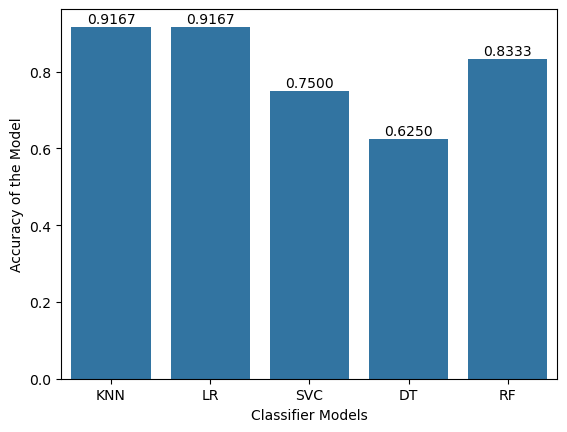

In [57]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier Models', ylabel='Accuracy of the Model')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.01, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

In [58]:
tr_split['Score'].max() 

0.9166666666666666

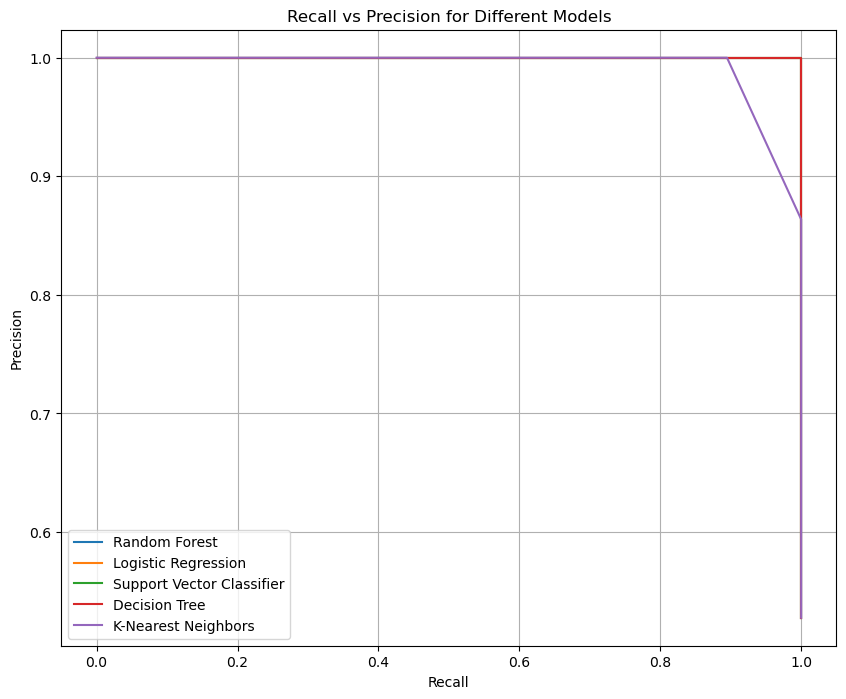

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'kerala.csv'
data = pd.read_csv(file_path)

# Encode target variable ('FLOODS') and prepare feature set
label_encoder = LabelEncoder()
data['FLOODS'] = label_encoder.fit_transform(data['FLOODS'])

# Separate features and target variable
X = data.drop(columns=['SUBDIVISION', 'YEAR', 'FLOODS'])
y = data['FLOODS']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scaling the features

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define models
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=2000, solver='lbfgs'),  # Increase max_iter and use 'lbfgs' solver
    'Support Vector Classifier': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train models and plot precision-recall curves
plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Get prediction probabilities
    y_probs = model.predict_proba(X_test)[:, 1]
    
    # Compute precision-recall values
    precision, recall, _ = precision_recall_curve(y_test, y_probs)
    
    # Plot precision-recall curve
    plt.plot(recall, precision, label=model_name)

# Customize and show plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Recall vs Precision for Different Models')
plt.legend()
plt.grid()
plt.show()


Model Performance Summary:
           Model  Precision    Recall  F1 Score  Accuracy       AUC
0  Random Forest   0.941176  0.842105  0.888889  0.888889  0.958204
1  Decision Tree   0.866667  0.684211  0.764706  0.777778  0.783282
2            SVM   0.944444  0.894737  0.918919  0.916667  0.981424


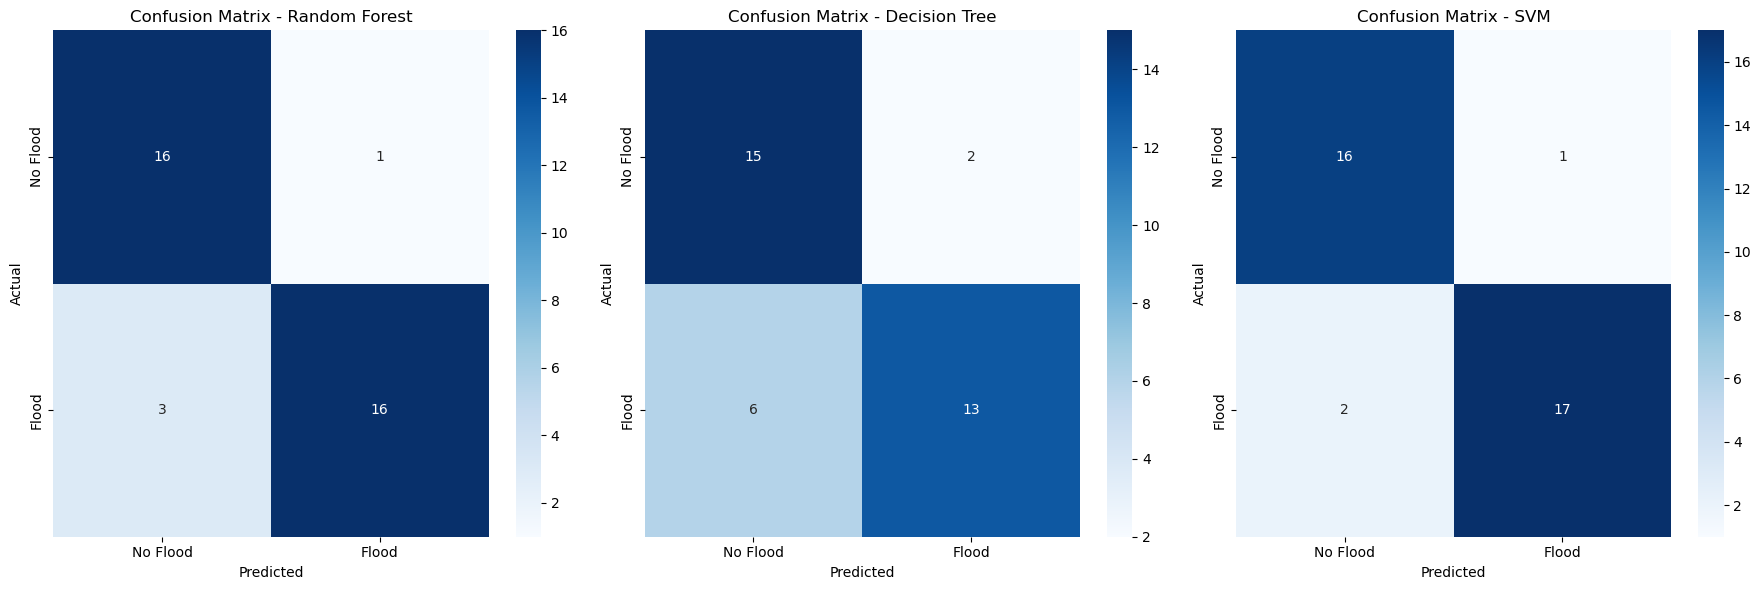

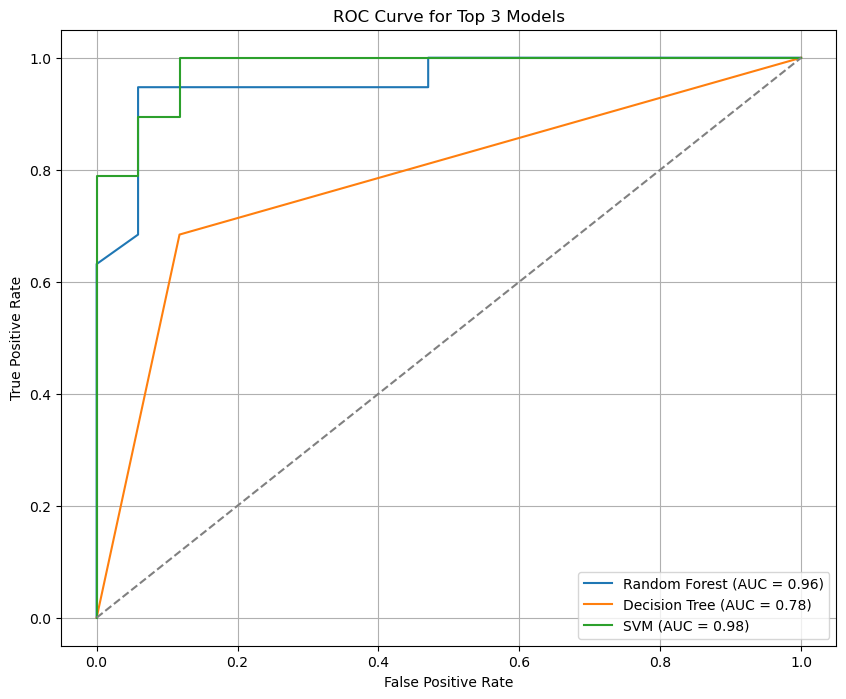

In [59]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'kerala.csv'  # Update this to the correct path if needed
data = pd.read_csv(file_path)

# Strip any whitespace characters from column names to ensure correct referencing
data.columns = data.columns.str.strip()

# Prepare the features (X) and target (y)
X = data.drop(columns=["SUBDIVISION", "YEAR", "FLOODS", "ANNUAL RAINFALL"])
y = data["FLOODS"].apply(lambda x: 1 if x == "YES" else 0)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

# Initialize a list to store results
results = []

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Calculate metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"
    
    # Append metrics to results
    results.append({
        "Model": model_name,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Accuracy": accuracy,
        "AUC": auc
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)
print("Model Performance Summary:")
print(results_df)

# Plot the confusion matrix and ROC curve for each model
plt.figure(figsize=(18, 6))

for i, (model_name, model) in enumerate(models.items(), start=1):
    # Generate and display the confusion matrix
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.subplot(1, 3, i)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["No Flood", "Flood"], yticklabels=["No Flood", "Flood"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")

plt.tight_layout()
plt.show()

# Plot ROC curves for each model
plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    if hasattr(model, "predict_proba"):
        # Get the prediction probabilities for the positive class
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        
        # Plot the ROC curve
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

# Plot the diagonal line for reference
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Top 3 Models")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [60]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
file_path = 'kerala.csv'  # Replace with the correct file path
data = pd.read_csv(file_path)

# Clean column names to remove any extra spaces
data.columns = data.columns.str.strip()

# Convert 'FLOODS' to binary (1 for 'YES', 0 for 'NO')
data['FLOODS'] = data['FLOODS'].map({'YES': 1, 'NO': 0})

# Define features (X) and target (y)
X = data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL RAINFALL']]
y = data['FLOODS']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=5000, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        14

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



### So we can see and choose the best model for Prediction.

# End of the Code.